In [1]:
import csv
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2

## STU Expansion

In [4]:
# Opening data
with open("results/STU.csv", 'rt') as f:
    reader = csv.reader(f)
    data = list(reader)

    # Passing data to lists, then to arrays (should change this to make it all in one) 
days_stu = []
spell_stu = []
dtin_stu = []
for row in data[1:]:
    if row[0]== '' or row[1] == '':
        pass
    else:
        days_stu.append(float(row[0]))
        spell_stu.append(float(row[1]))
        dtin_stu.append(int(row[2]))
        
first_spell_stu = []
second_spell_stu = []
for idx in range(len(days_stu)):
    if spell_stu[idx]==1:
        first_spell_stu.append(days_stu[idx])
    elif spell_stu[idx]==2:
        second_spell_stu.append(days_stu[idx])

## Non-Employment

In [11]:
# Opening data
with open("results/NE.csv", 'rt') as f:
    reader = csv.reader(f)
    data = list(reader)

    # Passing data to lists, then to arrays (should change this to make it all in one) 
days_ne = []
spell_ne = []
dtin_ne = []
for row in data[1:]:
    if row[0]== '' or row[1] == '':
        pass
    else:
        days_ne.append(float(row[0]))
        spell_ne.append(float(row[1]))
        dtin_ne.append(int(row[2]))
        
first_spell_ne = []
second_spell_ne = []
for idx in range(len(days_ne)):
    if spell_ne[idx]==1:
        first_spell_ne.append(days_ne[idx])
    elif spell_ne[idx]==2:
        second_spell_ne.append(days_ne[idx])

## Spell Adjustment

In [5]:
# Opening data
with open("results/Upper.csv", 'rt') as f:
    reader = csv.reader(f)
    data = list(reader)

    # Passing data to lists, then to arrays (should change this to make it all in one) 
days_SAdj = []
spell_SAdj = []
dtin_SAdj = []
for row in data[1:]:
    if row[0]== '' or row[1] == '':
        pass
    else:
        days_SAdj.append(float(row[0]))
        spell_SAdj.append(float(row[1]))
        dtin_SAdj.append(int(row[2]))
        
first_spell_SAdj = []
second_spell_SAdj = []
for idx in range(len(days_SAdj)):
    if spell_SAdj[idx]==1:
        first_spell_SAdj.append(days_SAdj[idx])
    elif spell_SAdj[idx]==2:
        second_spell_SAdj.append(days_SAdj[idx])

## LTU Expansion

In [6]:
# Opening data
with open("results/Lower.csv", 'rt') as f:
    reader = csv.reader(f)
    data = list(reader)

    # Passing data to lists, then to arrays (should change this to make it all in one) 
days2 = []
spell2 = []
dtin2 = []
for row in data[1:]:
    if row[0]== '' or row[1] == '':
        pass
    else:
        days2.append(float(row[0]))
        spell2.append(float(row[1]))
        dtin2.append(int(row[2]))

first_spell2 = []
second_spell2 = []
for idx in range(len(days2)):
    if spell2[idx]==1:
        first_spell2.append(days2[idx])
    elif spell2[idx]==2:
        second_spell2.append(days2[idx])

## Raw data

In [7]:
# Opening data
with open("results/LLower.csv", 'rt') as f:
    reader = csv.reader(f)
    data = list(reader)

    # Passing data to lists, then to arrays (should change this to make it all in one) 
days3 = []
spell3 = []
for row in data[1:]:
    if row[0]== '' or row[1] == '':
        pass
    else:
        days3.append(float(row[0]))
        spell3.append(float(row[1]))

In [8]:
first_spell3 = []
second_spell3 = []
for idx in range(len(days3)):
    if spell3[idx]==1:
        first_spell3.append(days3[idx])
    elif spell3[idx]==2:
        second_spell3.append(days3[idx])

# Plots

In [13]:
sns.set_style("whitegrid")

week_range = np.arange(0,1092,7)

# LTU
data_21, bins21 = np.histogram(first_spell2,week_range)
data_22, bins22 = np.histogram(second_spell2,week_range)

# Raw
data_31, bins31 = np.histogram(first_spell3,week_range)
data_32, bins32 = np.histogram(second_spell3,week_range)

# STU
data_stu, bins_stu = np.histogram(first_spell_stu,week_range)
data_stu2, bins_stu2 = np.histogram(second_spell_stu,week_range)

# NE
data_ne, bins_ne = np.histogram(first_spell_ne,week_range)


data_21 = data_21 / float(sum(data_21))
data_31 = data_31 / float(sum(data_31))
data_stu = data_stu / float(sum(data_stu))
data_ne = data_ne / float(sum(data_ne))

data_22 = data_22 / float(sum(data_22))
data_32 = data_32 / float(sum(data_32))
data_stu2 = data_stu2 / float(sum(data_stu2))

In [1]:
sns.set_palette('deep',4)
plt.figure(figsize=(28,12))
spikes = (4,8,13,17,26,52,78,104)

plt.plot(data_31,  lw=3, label='RU') #c='grey'
# plt.plot(data_21,lw=3, label='LTU Expansion',ls='--')
# plt.plot(data_stu, lw= 3.5, label='STU Expansion', ) #c='red' 
# plt.plot(data_ne, lw= 3, label='Non-Employment',ls='-.') #c='darkorange'

plt.legend(loc='best', framealpha=1.0, fontsize=32)
# plt.xticks(spikes,fontsize=28)
plt.xticks(np.arange(0,120,4),fontsize=24)
plt.yticks(fontsize=28)
for i in spikes:
    plt.axvline(i, c='navy', alpha=.3)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks',fontsize=32, labelpad=30 )
plt.ylim(0,0.08)

plt.savefig("./plots/RU_only_histogram.eps", format="eps", bbox_inches='tight')

plt.show()

NameError: name 'sns' is not defined

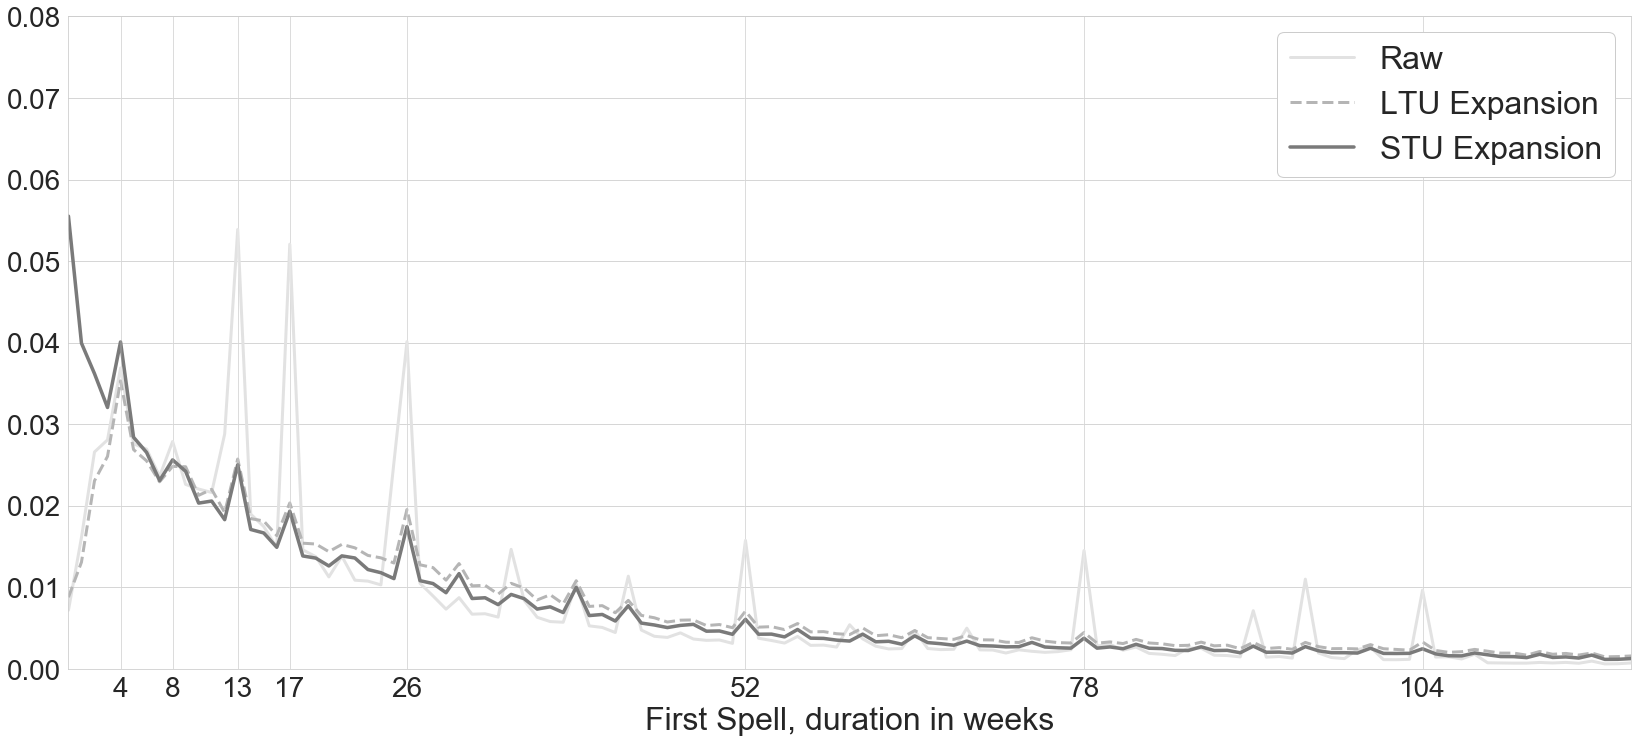

In [12]:
sns.set_palette('Greys',4)
plt.figure(figsize=(28,12))
spikes = (4,8,13,17,26,52,78,104)

plt.plot(data_31,  lw=3, label='Raw') #c='grey'
plt.plot(data_21,lw=3, label='LTU Expansion',ls='--')
plt.plot(data_stu, lw= 3.5, label='STU Expansion', ) #c='red' 
# plt.plot(data_ne, lw= 3, label='Non-Employment',ls='-.') #c='darkorange'

plt.legend(loc='best', framealpha=1.0, fontsize=32)
plt.xticks(spikes,fontsize=28)
plt.yticks(fontsize=28)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks',fontsize=32 )
plt.ylim(0,0.08)

# plt.savefig("Add2_spikes_bw.png", format="png", bbox_inches='tight')

plt.show()

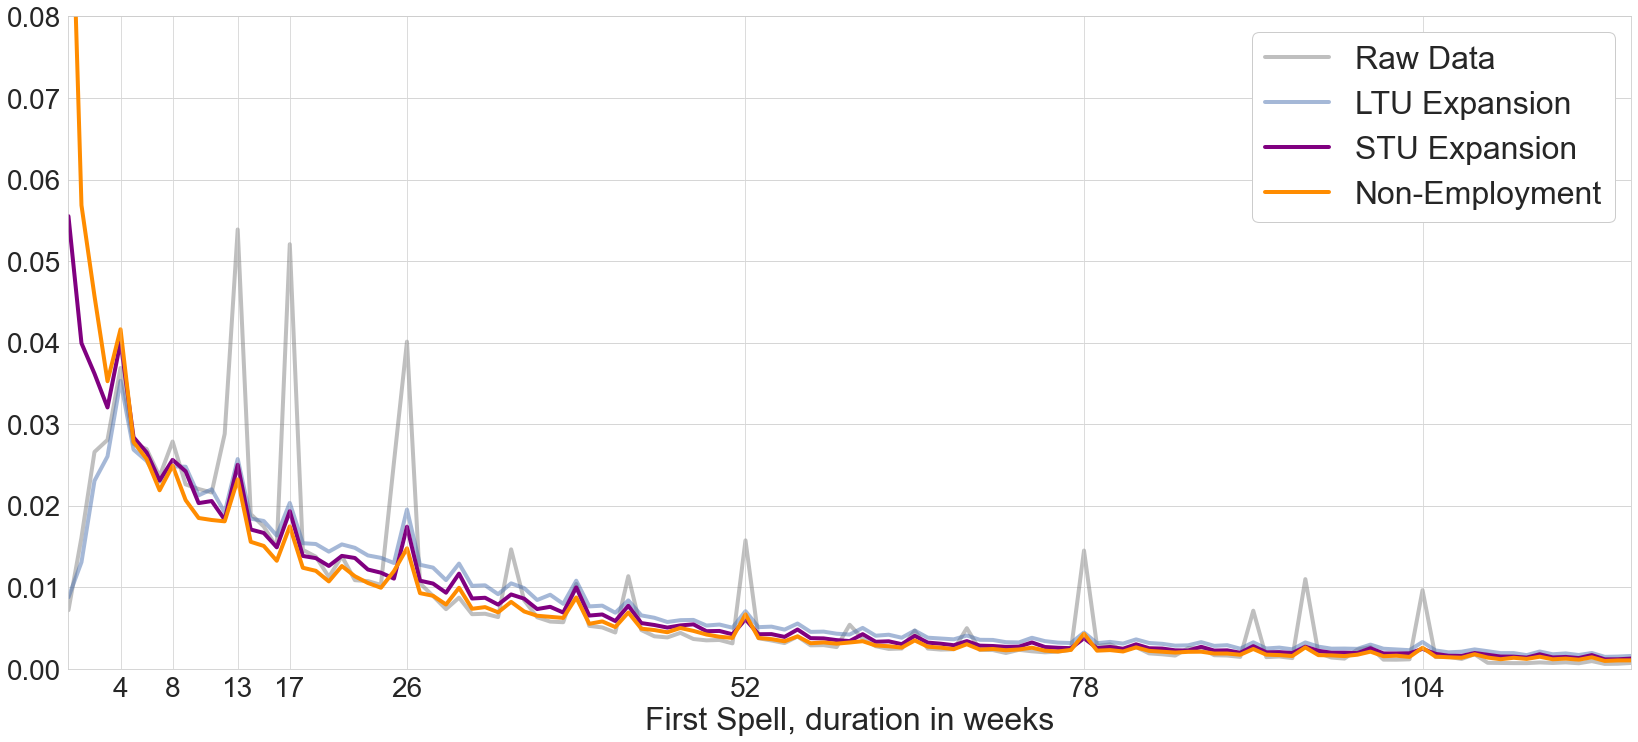

In [20]:
sns.set_palette('deep',4)
plt.figure(figsize=(28,12))
spikes = (4,8,13,17,26,52,78,104)

plt.plot(data_31,  lw=4, label='Raw Data',c='grey',alpha=0.5)
plt.plot(data_21,lw=4, label='LTU Expansion',alpha=0.5)
plt.plot(data_stu, lw= 4, label='STU Expansion', c='purple'  )
plt.plot(data_ne, lw= 4, label='Non-Employment',c='darkorange')

plt.legend(loc='best', framealpha=1.0, fontsize=32)
plt.xticks(spikes,fontsize=28)
plt.yticks(fontsize=28)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks',fontsize=32 )
plt.ylim(0,0.08)

# plt.savefig("plots/Add2_spikes.png", format="png", bbox_inches='tight')
# plt.savefig("Add2_spikes_bw.png", format="png", bbox_inches='tight')
# plt.savefig("plots/NE_only_histogram.pdf", format="pdf", bbox_inches='tight')

plt.show()

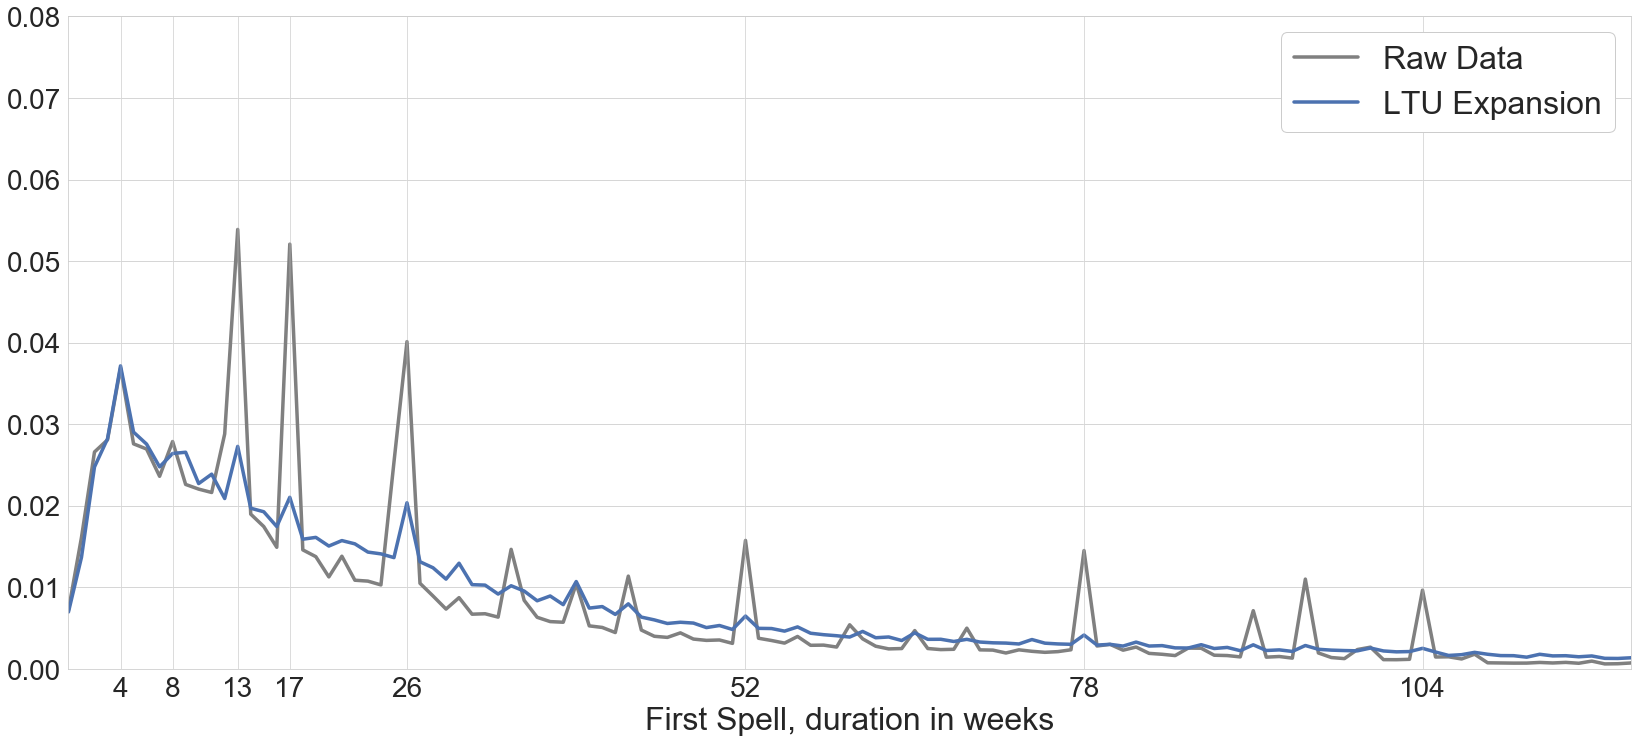

In [14]:
plt.figure(figsize=(28,12))
spikes = (4,8,13,17,26,52,78,104)
plt.plot(data_31,  lw=3.5, label='Raw Data',c='grey')
plt.plot(data_21,lw=3.5, label='LTU Expansion')

plt.legend(loc='best', framealpha=1.0, fontsize=32)
plt.xticks(spikes,fontsize=28)
plt.yticks(fontsize=28)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks',fontsize=32 )
plt.ylim(0,0.08)

plt.savefig("plots/Add1_spikes.png", format="png", bbox_inches='tight')

plt.show()

# First and Second Spells

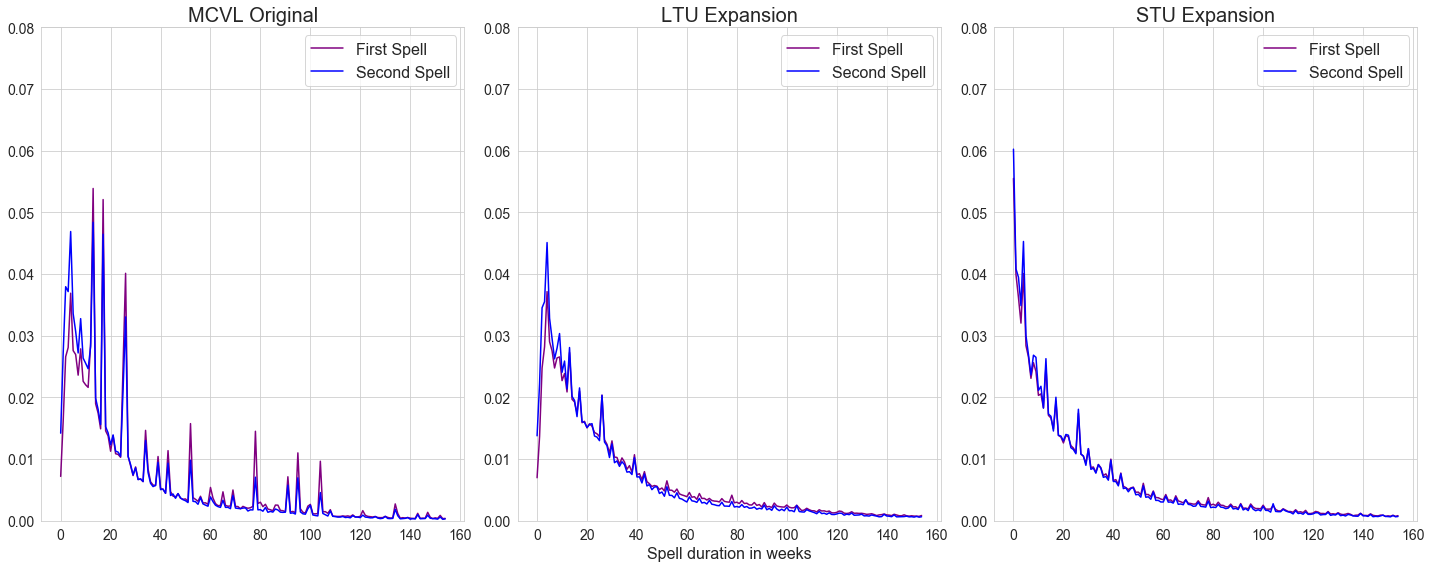

In [19]:
plt.figure(figsize=(20,8))
#plt.suptitle('Hazard rate by Spell Number', fontsize=22)
plt.subplot(131)
plt.plot(data_31, c= 'purple', label='First Spell')
plt.plot(data_32, c='b', label='Second Spell')
plt.legend(loc='best', fontsize=16)
plt.title('MCVL Original', fontsize=20)
plt.ylim(0,0.08)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(132)
plt.plot(data_21, c='purple', label='First Spell')
plt.plot(data_22, c='b', label='Second Spell')
plt.legend(loc='best', fontsize=16)
plt.title('LTU Expansion', fontsize=20)
plt.ylim(0,0.08)
plt.xlabel('Spell duration in weeks',fontsize=16 )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(133)
plt.plot(data_stu, c='purple', label='First Spell')
plt.plot(data_stu2, c='b', label='Second Spell')
plt.legend(loc='best', fontsize=16)
plt.title('STU Expansion', fontsize=20)
plt.ylim(0,0.08)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig("plots/n_spell.png", format='png', box_inches='tight')

plt.show()